In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

# 部位のU値から壁体構成を与える

## Outline

- 屋根・天井、外壁、床、界壁、界床、界床（天井）の構成は、入力値である部位種別の熱貫流率と極力一致するよう、構造種別に応じ、以下の構成における断熱材の厚さを、0mm以上の範囲で、1mm単位で切り捨てて調整する。
- 熱貫流率の入力値が大きい場合、断熱材の厚さを0mmとしても入力値の熱貫流率を再現できないことがあるが、この場合はその差を許容する。

屋根・天井壁体構成（木造、鉄骨造、その他/不明）

| 材料 | 厚さ, m | 熱伝導率, W m<sup>-1</sup> K<sup>-1</sup> | 熱抵抗, m<sup>2</sup>2 k W<sup>-1</sup> | 容積比熱, J L<sup>-1</sup> K<sup>-1</sup> |
|---|---|---|---|
| Ro | - | - | 0.040 | 0 |
| 住宅用グラスウール断熱材16K相当 | ≧0mm | 0.045 |  | 13 |
| せっこうボード | 0.0095 | 0.22 | 0.043 | 830 |
| Ri | - | - | 0.090 | 0 |

外壁壁体構成（木造、鉄骨造、その他/不明）

| 材料 | 厚さ, m | 熱伝導率, W m<sup>-1</sup> K<sup>-1</sup> | 熱抵抗, m<sup>2</sup>2 k W<sup>-1</sup> | 容積比熱, J L<sup>-1</sup> K<sup>-1</sup> |
|---|---|---|---|
| Ro | - | - | 0.040 | 0 |
| 住宅用グラスウール断熱材16K相当 | ≧0mm | 0.045 |  | 13 |
| せっこうボード | 0.0095 | 0.22 | 0.043 | 830 |
| Ri | - | - | 0.110 | 0 |

床壁体構成（木造、鉄骨造、その他/不明）

| 材料 | 厚さ, m | 熱伝導率, W m<sup>-1</sup> K<sup>-1</sup> | 熱抵抗, m<sup>2</sup>2 k W<sup>-1</sup> | 容積比熱, J L<sup>-1</sup> K<sup>-1</sup> |
|---|---|---|---|
| Ro | - | - | 0.040 | 0 |
| 住宅用グラスウール断熱材16K相当 | ≧0mm | 0.045 |  | 13 |
| 合板 | 0.012 | 0.16 | 0.075 | 720 |
| Ri | - | - | 0.150 | - | - |

界床（天井）壁体構成（木造、鉄骨造、その他/不明）

| 材料 | 厚さ, m | 熱伝導率, W m<sup>-1</sup> K<sup>-1</sup> | 熱抵抗, m<sup>2</sup>2 k W<sup>-1</sup> | 容積比熱, J L<sup>-1</sup> K<sup>-1</sup> |
|---|---|---|---|
| Ro | - | - | 0.090 | 0 |
| 住宅用グラスウール断熱材16K相当 | ≧0mm | 0.045 |  | 13 |
| せっこうボード | 0.0095 | 0.22 | 0.043 | 830 |
| Ri | - | - | 0.090 | 0 |

界壁壁体構成（木造、鉄骨造、その他/不明）

| 材料 | 厚さ, m | 熱伝導率, W m<sup>-1</sup> K<sup>-1</sup> | 熱抵抗, m<sup>2</sup>2 k W<sup>-1</sup> | 容積比熱, J L<sup>-1</sup> K<sup>-1</sup> |
|---|---|---|---|
| Ro | - | - | 0.110 | 0 |
| 住宅用グラスウール断熱材16K相当 | ≧0mm | 0.045 |  | 13 |
| せっこうボード | 0.0095 | 0.22 | 0.043 | 830 |
| Ri | - | - | 0.110 | 0 |


界床壁体構成（木造、鉄骨造）

| 材料 | 厚さ, m | 熱伝導率, W m<sup>-1</sup> K<sup>-1</sup> | 熱抵抗, m<sup>2</sup>2 k W<sup>-1</sup> | 容積比熱, J L<sup>-1</sup> K<sup>-1</sup> |
|---|---|---|---|
| Ro | - | - | 0.150 | 0 |
| 住宅用グラスウール断熱材16K相当 | ≧0mm | 0.045 |  | 13 |
| 合板 | 0.012 | 0.16 | 0.075 | 720 |
| Ri | - | - | 0.150 | - | - |

屋根・天井壁体構成（鉄筋コンクリート造等）

| 材料 | 厚さ, m | 熱伝導率, W m<sup>-1</sup> K<sup>-1</sup> | 熱抵抗, m<sup>2</sup>2 k W<sup>-1</sup> | 容積比熱, J L<sup>-1</sup> K<sup>-1</sup> |
|---|---|---|---|
| Ro | - | - | 0.040 | 0 |
| コンクリート | 0.120 | 1.6 | 0.075 | 2000 |
| 住宅用グラスウール断熱材16K相当 | ≧0mm | 0.045 |  | 13 |
| Ri | - | - | 0.090 | 0 |

外壁壁体構成（鉄筋コンクリート造等）

| 材料 | 厚さ, m | 熱伝導率, W m<sup>-1</sup> K<sup>-1</sup> | 熱抵抗, m<sup>2</sup>2 k W<sup>-1</sup> | 容積比熱, J L<sup>-1</sup> K<sup>-1</sup> |
|---|---|---|---|
| Ro | - | - | 0.040 | 0 |
| コンクリート | 0.120 | 1.6 | 0.075 | 2000 |
| 住宅用グラスウール断熱材16K相当 | ≧0mm | 0.045 |  | 13 |
| Ri | - | - | 0.110 | 0 |

床壁体構成（鉄筋コンクリート造等）

| 材料 | 厚さ, m | 熱伝導率, W m<sup>-1</sup> K<sup>-1</sup> | 熱抵抗, m<sup>2</sup>2 k W<sup>-1</sup> | 容積比熱, J L<sup>-1</sup> K<sup>-1</sup> |
|---|---|---|---|
| Ro | - | - | 0.040 | 0 |
| コンクリート | 0.120 | 1.6 | 0.075 | 2000 |
| 住宅用グラスウール断熱材16K相当 | ≧0mm | 0.045 |  | 13 |
| Ri | - | - | 0.150 | - | - |

界床（天井）壁体構成（鉄筋コンクリート造等）

| 材料 | 厚さ, m | 熱伝導率, W m<sup>-1</sup> K<sup>-1</sup> | 熱抵抗, m<sup>2</sup>2 k W<sup>-1</sup> | 容積比熱, J L<sup>-1</sup> K<sup>-1</sup> |
|---|---|---|---|
| Ro | - | - | 0.090 | 0 |
| コンクリート | 0.120 | 1.6 | 0.075 | 2000 |
| 住宅用グラスウール断熱材16K相当 | ≧0mm | 0.045 |  | 13 |
| Ri | - | - | 0.090 | 0 |

界壁壁体構成（鉄筋コンクリート造等）

| 材料 | 厚さ, m | 熱伝導率, W m<sup>-1</sup> K<sup>-1</sup> | 熱抵抗, m<sup>2</sup>2 k W<sup>-1</sup> | 容積比熱, J L<sup>-1</sup> K<sup>-1</sup> |
|---|---|---|---|
| Ro | - | - | 0.110 | 0 |
| コンクリート | 0.120 | 1.6 | 0.075 | 2000 |
| 住宅用グラスウール断熱材16K相当 | ≧0mm | 0.045 |  | 13 |
| Ri | - | - | 0.110 | 0 |

界床壁体構成（鉄筋コンクリート造等）

| 材料 | 厚さ, m | 熱伝導率, W m<sup>-1</sup> K<sup>-1</sup> | 熱抵抗, m<sup>2</sup>2 k W<sup>-1</sup> | 容積比熱, J L<sup>-1</sup> K<sup>-1</sup> |
|---|---|---|---|
| Ro | - | - | 0.150 | 0 |
| コンクリート | 0.120 | 1.6 | 0.075 | 2000 |
| 住宅用グラスウール断熱材16K相当 | ≧0mm | 0.045 |  | 13 |
| Ri | - | - | 0.150 | - | - |

## Class

In [2]:
class Material:
    
    def __init__( self, name, thick, cond, spech ):
        self.name   = name
        self.thick  = thick   # thickness, m
        self.cond   = cond    # thermal conductivity, W/mK
        self.spech  = spech   # volumetric specific heat, J/LK
    
    def R( self ):
        return self.thick / self.cond

## Example

In [3]:
m = Material( 'GPB', 0.0095, 0.22, 830 )

In [4]:
m.name, m.thick, m.cond, m.spech, m.R()

('GPB', 0.0095, 0.22, 830, 0.04318181818181818)

## Function

In [5]:
def get_gypsum():
    return Material( name = 'GPB', thick = 0.0095, cond = 0.22, spech =  830.0 )

def get_plywood():
    return Material( name = 'PED', thick = 0.012,  cond = 0.16, spech =  720.0 )

def get_concrete():
    return Material( name = 'RC',  thick = 0.120,  cond = 1.60, spech = 2000.0 )

def convert_u_value_to_spec(structure, typeOfPart, U):
    # structure as string : Wood, Steel, RC, Other
    # typeOfPart as string: Ceiling, Wall, Floor, BoundaryCeiling, BoundaryWall, BoundaryFloor
    # U: heat transfer coefficient (W/m2K)
    s = structure
    t = typeOfPart
    R = 1 / U
    
    Ro, Ri = {
        'Ceiling'         : ( 0.040, 0.090 ),
        'Wall'            : ( 0.040, 0.110 ),
        'Floor'           : ( 0.040, 0.150 ),
        'BoundaryCeiling' : ( 0.090, 0.090 ),
        'BoundaryWall'    : ( 0.110, 0.110 ),
        'BoundaryFloor'   : ( 0.150, 0.150 ),
    }[t]
    
    mGypsum   = get_gypsum()
    mPlywood  = get_plywood()
    mConcrete = get_concrete()
    
    ins_name, ins_cond, ins_spech = 'GW16K', 0.045, 13.0
    
    def d( m ):
        return ( math.floor( max(0,( R -( Ro + m.R() + Ri )) * ins_cond ) * 1000 ) ) / 1000
    
    if ( s in ['Wood', 'Steel', 'Other'] ):
        m = {
            'Ceiling'         : mGypsum,
            'Wall'            : mGypsum,
            'Floor'           : mPlywood,
            'BoundaryWall'    : mGypsum,
            'BoundaryFloor'   : mPlywood,
            'BoundaryCeiling' : mGypsum,
        }[t]
        Layer= [ Material( name = ins_name, thick = d(m), cond = ins_cond, spech = ins_spech ), m ]
    elif s == 'RC':
        m = mConcrete
        Layer= [ m, Material( name = ins_name, thick = d(m), cond = ins_cond, spech = ins_spech ) ]    
    else:
        raise ValueError
        
    return Layer

## Example 1

In [6]:
m = convert_u_value_to_spec( structure = 'Wood', typeOfPart = 'Wall', U = 0.538 )
vars(m[0]), vars(m[1])

({'cond': 0.045, 'name': 'GW16K', 'spech': 13.0, 'thick': 0.074},
 {'cond': 0.22, 'name': 'GPB', 'spech': 830.0, 'thick': 0.0095})

## Example 2

U値と断熱材厚の関係のグラフ作成

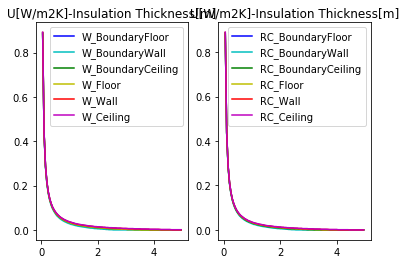

In [7]:
plt.subplot(1, 2, 1)
x=np.arange(0.05,5,0.05)
y=[[],[],[],[],[],[],[]]

wall_type = ['Ceiling','Wall','Floor','BoundaryWall','BoundaryFloor','BoundaryCeiling']

for i in x:
    for j in wall_type:
        temp = convert_u_value_to_spec( 'Wood', j, i )
        #print(wall_type.index(j)) 
        y[wall_type.index(j)].append(temp[0].thick)        
        #print(y[wall_type.index(j)])
        
plt.title(r"U[W/m2K]-Insulation Thickness[m]")
plt.plot(x,y[5],'b',label="W_BoundaryFloor")
plt.plot(x,y[4],'c',label="W_BoundaryWall")
plt.plot(x,y[3],'g',label="W_BoundaryCeiling")
plt.plot(x,y[2],'y',label="W_Floor")
plt.plot(x,y[1],'r',label="W_Wall")
plt.plot(x,y[0],'m',label="W_Ceiling")
plt.legend()

plt.subplot(1, 2, 2)
x=np.arange(0.05,5,0.05)
y=[[],[],[],[],[],[],[]]
for i in x:
    for j in wall_type:
        temp = convert_u_value_to_spec( 'RC' , j, i )
        y[wall_type.index(j)].append(temp[1].thick)        
    
plt.title(r"U[W/m2K]-Insulation Thickness[m]")
plt.plot(x,y[5],'b',label="RC_BoundaryFloor")
plt.plot(x,y[4],'c',label="RC_BoundaryWall")
plt.plot(x,y[3],'g',label="RC_BoundaryCeiling")
plt.plot(x,y[2],'y',label="RC_Floor")
plt.plot(x,y[1],'r',label="RC_Wall")
plt.plot(x,y[0],'m',label="RC_Ceiling")
plt.legend()

plt.show()